# Linear model

It is the linear eqution of feature which predict the target value using regression .

y(x)  = w0 + w1x1  + w2x2 + w3x3 .....

w  =  (w1 , w2 , w3...wn) are cofficient and w0 are intersept

# ordinary least square

lenear regression fit a linear model with cofficient w to minimize the the redusal sum of square between the target value and predicted value

cost = min||y_pre - y||^2

Now code for linear regression 

In [1]:
from sklearn import linear_model

In [2]:
li_reg  =linear_model.LinearRegression()

In [3]:
x_train = [[0, 0], [1, 1], [2, 2]]  
y_train = [0, 1, 2]

In [4]:
li_reg.fit(x_train , y_train)

LinearRegression()

In [5]:
li_reg.coef_

array([0.5, 0.5])

In [6]:
li_reg.intercept_

1.1102230246251565e-16

In [7]:
x_test = [[1, 0], [2, 1], [3, 2]]

In [8]:
li_reg.predict(x_test)

array([0.5, 1.5, 2.5])

Note if two feature are corelated then the matrix become singular and there may be a random error for test set in ordinary least square

ordinary least square complexity

The least squares solution is computed using the singular value decomposition of X. If X is a matrix of shape (n_samples, n_features) this method has a cost of O(n_samples*n_feature^2)

# Ridge regression and classification

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

cost = min||y_pre - y||^2 + a||w||^2

Now code for ridge

In [9]:
from sklearn import linear_model
ridge_reg  = linear_model.Ridge()
ridge_reg.fit(x_train , y_train)

Ridge()

In [10]:
ridge_reg.coef_

array([0.4, 0.4])

In [11]:
ridge_reg.intercept_

0.19999999999999996

In [12]:
ridge_reg.predict(x_test)

array([0.6, 1.4, 2.2])

The Ridge regressor has a classifier variant: RidgeClassifier
    

The RidgeClassifier can be significantly faster than e.g. LogisticRegression with a high number of classes because it can compute the projection matrix (xTx)-1xT only once.

# RidgeCV

RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Leave-One-Out Cross-Validation:

In [13]:
import numpy as np
from sklearn import linear_model
reg_cv = linear_model.RidgeCV(alphas=0.1)
reg_cv.fit(x_train , y_train)
reg_cv.predict(x_test)
# RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
#       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))
# >>> reg.alpha_
# 0.01

array([0.51219512, 1.48780488, 2.46341463])

# Lasso

The Lasso is a linear model that estimates sparse coefficients.


Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

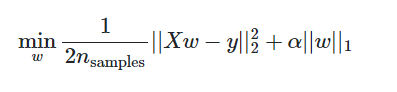

Lasso uses coordinate descent as the algorithm to fit the coefficients.

In [14]:
from sklearn import linear_model 
laso_re  = linear_model.Lasso(alpha  = 0.2)
laso_re.fit(x_train  ,y_train)

Lasso(alpha=0.2)

In [15]:
laso_re.predict(x_test)

array([1. , 1.7, 2.4])

In [16]:
laso_re.coef_

array([0.7, 0. ])

# Polynomial regression

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

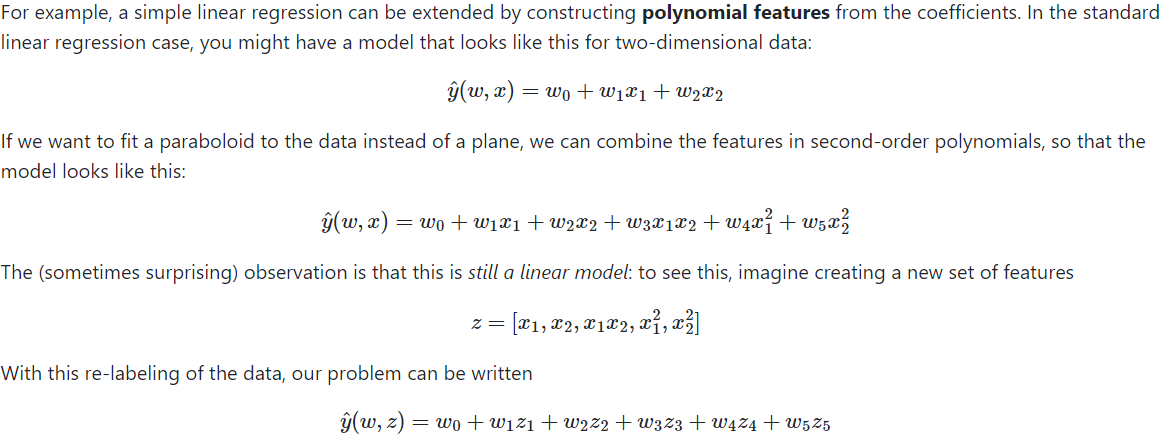

In [17]:
from sklearn import preprocessing

In [18]:
poly  =preprocessing.PolynomialFeatures(degree = 2)

In [19]:
poly.fit_transform(x_train)

array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 2., 2., 4., 4., 4.]])

NOw use this as new traing data with 6 feature

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [21]:
model  = Pipeline([('poly' , PolynomialFeatures(degree  =2)) ,
                    ('linr' , LinearRegression())])

In [22]:
model  =  model.fit(x_train,y_train)

In [23]:
model.named_steps['linr'].coef_

array([-8.88178420e-16,  5.00000000e-01,  5.00000000e-01, -1.11022302e-16,
       -1.11022302e-16, -1.11022302e-16])

In [24]:
x_tet  = poly.fit_transform(x_test)
model.named_steps['linr'].predict(x_tet)

array([0.5, 1.5, 2.5])